In [1]:
import os
import pandas as pd
os.chdir('../../')
!pwd

/root/python/myenv/medical-coding-reproducibility-main


In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

from src.settings import PALETTE,MODEL_NAMES

df = pd.read_csv('./files/retrieval/pseudo_relevance_feedback.csv')
# Replace model names with custom names
df=df[df['TopKSelection']==10]
df['model'] = df['model'].replace(MODEL_NAMES)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from src.settings import PALETTE, MODEL_NAMES

df = pd.read_csv('./files/retrieval/pseudo_relevance_feedback.csv')
# Replace model names with custom names
df['model'] = df['model'].replace(MODEL_NAMES)

# Group by model and NavgTop, calculate mean and standard deviation of f1_micro
grouped_df = df.groupby(['TopKSelection'])['f1_micro'].agg(['mean', 'std']).reset_index()


In [4]:
df.columns

Index(['model', 'doc', 'psr', 'iteration', 'CosSim_Thresh', 'TopKSelection',
       'f1_micro', 'f1_macro', 'exact_match_ratio', 'precision@8',
       'precision@15', 'precision@recall', 'map', 'precision_micro',
       'recall_micro', 'fpr_micro', 'auc_micro', 'auc_macro'],
      dtype='object')

/tmp/ipykernel_119334/772641122.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
/tmp/ipykernel_119334/772641122.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
/tmp/ipykernel_119334/772641122.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
/tmp/ipykernel_119334/772641122.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
/tmp/ipykernel_119334/772641122.py:26: UserWarning: set_

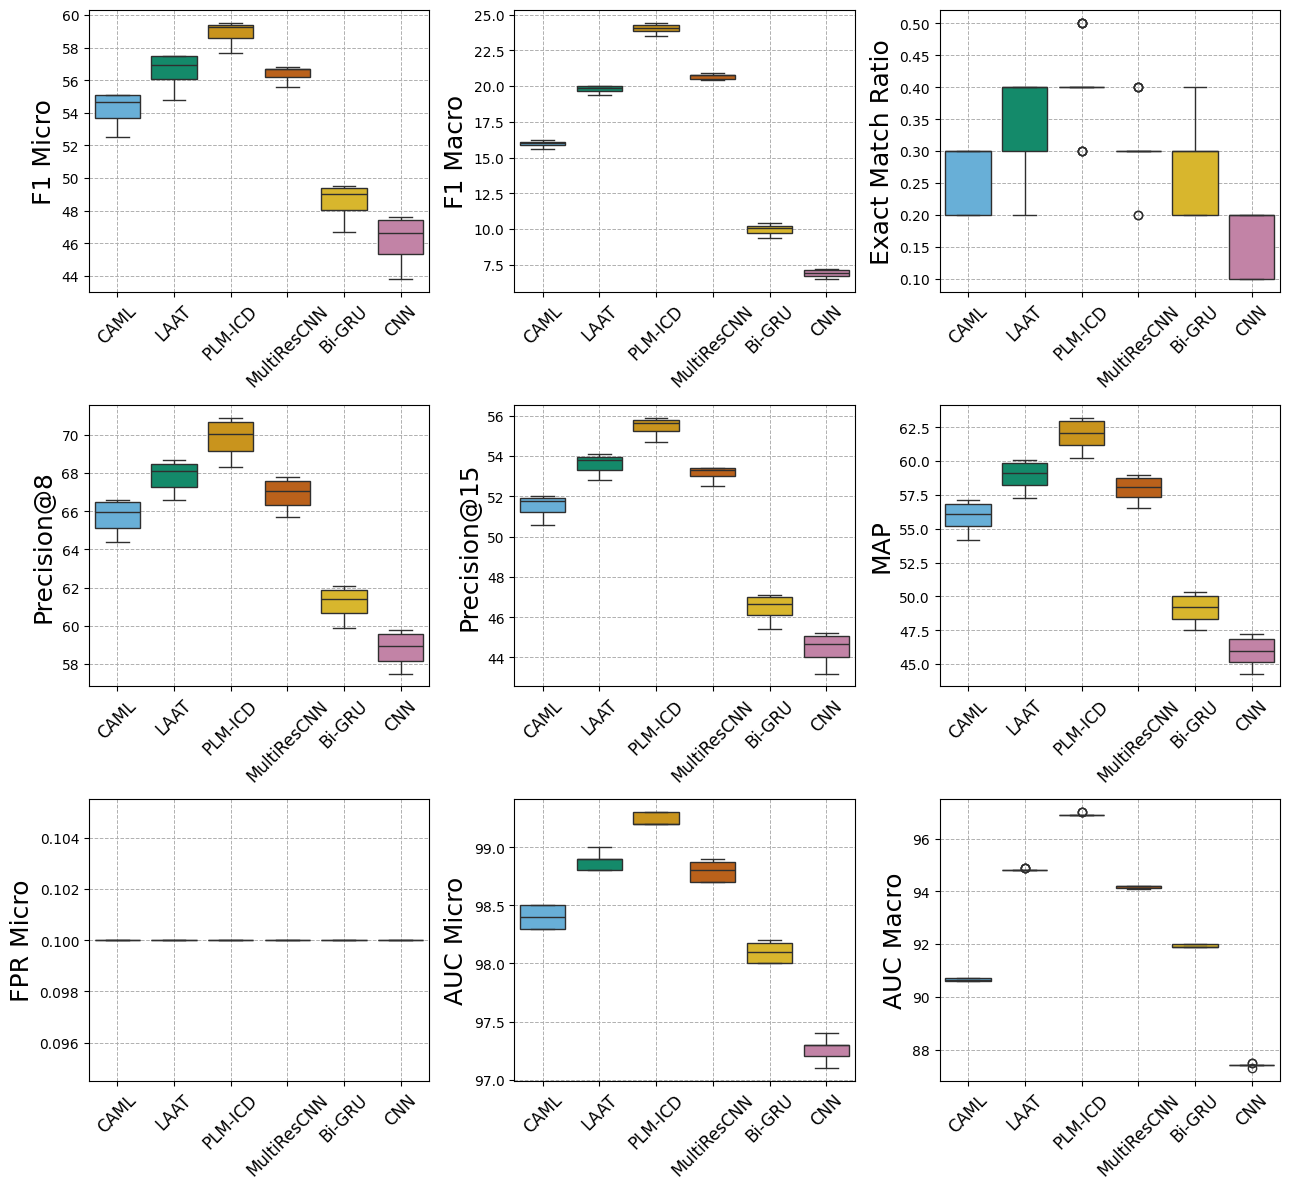

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['f1_micro', 'f1_macro', 'exact_match_ratio', 'precision@8', 'precision@15', 'map','fpr_micro', 'auc_micro', 'auc_macro']
titles = ['F1 Micro', 'F1 Macro', 'Exact Match Ratio', 'Precision@8', 'Precision@15', 'MAP', 'FPR Micro', 'AUC Micro', 'AUC Macro']

# Create a figure with 3 columns and 2 rows of subplots
fig, axes = plt.subplots(3, 3, figsize=(13, 12))

#fig.suptitle('Effect of pseudo relevance feedback across iterations on PLM-ICD', fontsize=22, fontweight='bold')

# Loop through each metric and plot it in the corresponding subplot
for i, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[i // 3, i % 3]  # Get the correct subplot (row, col)
    sns.boxplot(x='model', y=metric, hue='model', data=df, palette=PALETTE, ax=ax)

    # Customize plot
    ax.set_xlabel('', fontsize=18)
    ax.set_ylabel(title, fontsize=18)


    # Add gridlines
    ax.grid(True, axis='both', linestyle='--', linewidth=0.7)

    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

# Adjust layout to make it look clean
plt.tight_layout()

# Save the image
plt.savefig('./files/retrieval/model_i10.png', dpi=300, bbox_inches='tight')

plt.show()
